<a href="https://colab.research.google.com/github/CodingAlex12/Inteligencia_Artificial/blob/main/ProyectoFInalIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
### import the libraries and modules required

# libraries to manipulate the data and to visualise it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# this is the library that contains the NN capabilities
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# the evaluation metrics for regression
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from math import sqrt
import seaborn as sn
# for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation

####Lista de cada columna con su significado:

- Student ID
- Student Age (1: 18-21, 2: 22-25, 3: above 26)
- Sex (1: female, 2: male)
- Graduated high-school type: (1: private, 2: state, 3: other)
- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
- Additional work: (1: Yes, 2: No)
- Regular artistic or sports activity: (1: Yes, 2: No)
- Do you have a partner: (1: Yes, 2: No)
- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
- Mothers' education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- Fathers' education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
- Mothers' occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
- Fathers' occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
- Attendance to classes (1: always, 2: sometimes, 3: never)
- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
- Taking notes in classes: (1: never, 2: sometimes, 3: always)
- Listening in classes: (1: never, 2: sometimes, 3: always)
- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- Course ID
- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)





In [97]:
# generate a pandas dataframe with the file that contains the dataset
dataset = pd.read_csv(filepath_or_buffer = '/content/DATA.csv', names = [
    "Student ID",
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers’ education",
    "Fathers’ education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers’ occupation",
    "Fathers’ occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester",
    "Expected Cumulative grade point average in the graduation",
    "Course ID",
    "OGrade"])

# take a look of the data
dataset = dataset.iloc[1:]
dataset['OGrade'] = dataset['OGrade'].astype(int)
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))
dataset

The dataset contains 145 observations and 33 features



,Student ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation,Course ID,OGrade
1,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
2,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
3,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
4,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
5,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
142,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
143,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
144,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [98]:
# check how many observations we have for each class/species
dataset.groupby("OGrade").size()

OGrade
0     8
1    35
2    24
3    21
4    10
5    17
6    13
7    17
dtype: int64

OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

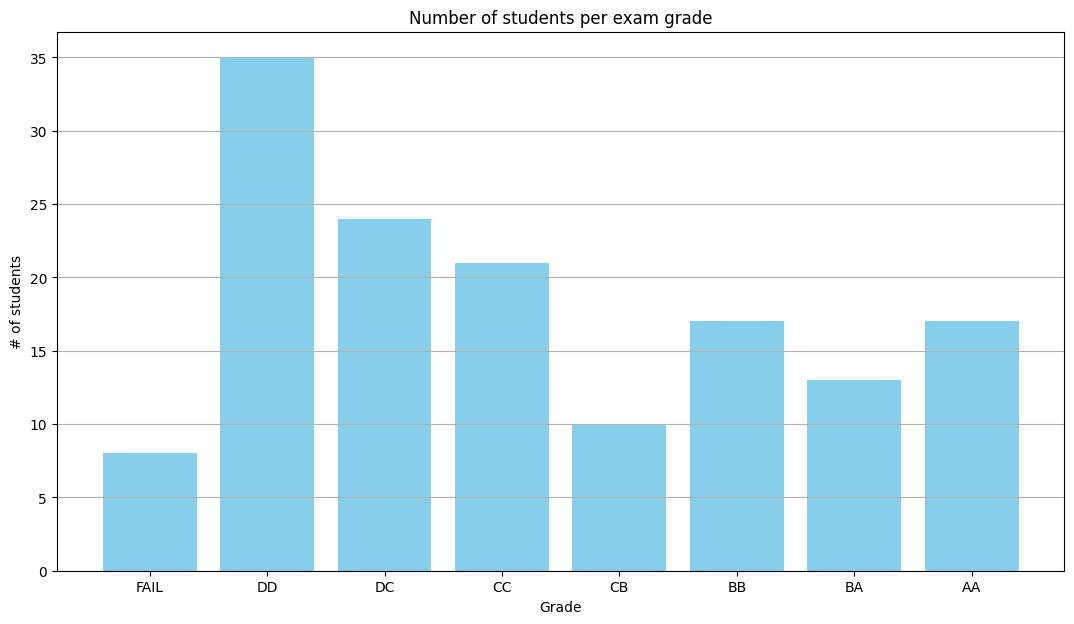

In [99]:
# Filtrar los datos por grado de salida
FAIL = dataset[dataset.OGrade== 0]
DD = dataset[dataset.OGrade == 1]
DC = dataset[dataset.OGrade == 2]
CC = dataset[dataset.OGrade == 3]
CB = dataset[dataset.OGrade == 4]
BB = dataset[dataset.OGrade == 5]
BA = dataset[dataset.OGrade == 6]
AA = dataset[dataset.OGrade == 7]

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # Ajustar el tamaño del gráfico

# Contar el número de estudiantes en cada categoría de grado
grades = ['FAIL', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
students_count = [len(FAIL), len(DD), len(DC), len(CC), len(CB), len(BB), len(BA), len(AA)]

# Dibujar el gráfico de barras
ax.bar(grades, students_count, color='skyblue')

# Ajustar etiquetas y título
ax.set_xlabel("Grade")
ax.set_ylabel("# of students")
ax.grid(axis='y')
ax.set_title("Number of students per exam grade")

# Mostrar el gráfico
plt.show()


In [100]:

# X será nuestro conjunto de datos sin la característica de interés
X = dataset.drop('OGrade', axis=1)

# Convertingir en un array de numpy y seleccionar las características relevantes
X = X.to_numpy()[:, 1:]  # Eliminando 'Student ID' y seleccionando todas las columnas excepto 'OGrade'

# y será nuestra variable objetivo
y = dataset['OGrade']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [101]:
print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
Student ID                                                          STUDENT1
Student Age                                                                1
Sex                                                                        1
Graduated high-school type                                                 1
Scholarship type                                                           1
Additional work                                                            1
Regular artistic or sports activity                                        1
Do you have a partner                                                      1
Total salary if available                                                  1
Transportation to the university                                           1
Accommodation type in Cyprus                                               1
Mothers’ education                                                         1
Fathers’ education                          

In [102]:
# defining a Multi-layer Perceptron classifier
mlp_clf = MLPClassifier(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(40),
    # maximum number of iterations for the solver
    max_iter = 1500,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'adam'
    )

In [103]:
# training the model
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=40, max_iter=1500)

In [104]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array([1, 7, 1, 1, 7, 2, 2, 2, 3, 1, 7, 3, 1, 1, 3, 0, 1, 1, 1, 1, 5, 0,
       4, 5, 1, 1, 1, 7, 4, 1, 1, 7, 1, 1, 1, 1, 5, 1, 1, 4, 7, 1, 1, 1,
       5, 5, 1, 1, 1, 6, 1, 1, 7, 5, 7, 7, 1, 3, 1, 1, 1, 5, 5, 6, 7, 7,
       1, 1, 3, 5, 1, 7, 1])

In [105]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# precision, recall, f1-score, and support
#   please be aware of the metrics we have and what we can use
#   the f1-score is for binary targets
print(classification_report(y_test, y_pred))

Accuracy: 0.18
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.24      0.60      0.35        15
           2       0.00      0.00      0.00        14
           3       0.20      0.07      0.11        14
           4       0.00      0.00      0.00         6
           5       0.11      0.12      0.12         8
           6       0.00      0.00      0.00         6
           7       0.08      0.20      0.12         5

    accuracy                           0.18        73
   macro avg       0.14      0.15      0.12        73
weighted avg       0.14      0.18      0.13        73



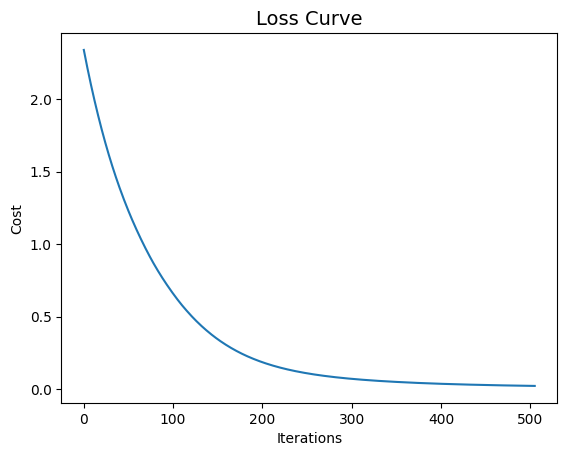

In [106]:
# see how well was the training of the model
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

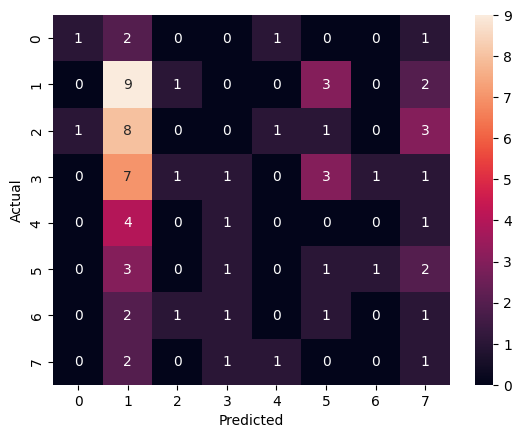

In [107]:
### see how well was the testing of the model

# generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [108]:
# take a look at the predictions
y_pred_pd = pd.DataFrame(y_pred)
print('Predictions \n{}\n'.format(y_pred_pd.describe()))

# take a look at the true examples
print('Groundtruth \n{}'.format(y_test.describe()))

Predictions 
               0
count  73.000000
mean    2.890411
std     2.406944
min     0.000000
25%     1.000000
50%     1.000000
75%     5.000000
max     7.000000

Groundtruth 
count    73.000000
mean      3.013699
std       2.010342
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       7.000000
Name: OGrade, dtype: float64


## Hyper parameter Tuning

In [109]:
# we can define a set of parameters that we are interested to train with our
#   model
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80), (100)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Strength of the L2 regularization term
    # “Regularization is any modification we make to a learning algorithm that
    #   is intended to reduce its generalization error but not its training
    #   error.” — Ian Goodfellow
    'alpha': [0.0001, 0.05],
    # a value that works as the temperature in the simulated annealing algorithm
    #   but for the stochastic gradient descent algorithm
    'learning_rate': ['constant','adaptive'],
}

In [110]:
# we define a grid search approach to train several models with Cross-validation

grid = GridSearchCV(
    # the structure of the model we are interest in
    mlp_clf,
    # the different hyper parameters we want to train
    param_grid,
    # use paralelisation. -1 = use all processors
    n_jobs = -1,
    # number of folds use in cross-validation approach
    cv = 5
    )

In [111]:
# execute the hyper parameter tuning
#   this process can take a while
grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=40, max_iter=1500),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [50, 100, 150],
                         'solver': ['sgd', 'adam']})

In [112]:
# get the best values for each hyper parameter tuned
print('The best hyper parameter values are:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'sgd'}


In [113]:
# save the results as pandas dataframe to easily interact with the data
grid_results = pd.DataFrame(grid.cv_results_)

In [114]:
# show the results of the grid search hyper parameter tuning by best scores
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
40,0.586941,0.023137,0.002696,0.000150,tanh,0.05,"(150, 100, 50)",constant,150,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.333333,0.333333,0.285714,0.428571,0.500000,0.376190,0.077372,1
127,0.112244,0.012049,0.002193,0.000351,relu,0.05,"(120, 80)",adaptive,50,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.400000,0.400000,0.285714,0.428571,0.357143,0.374286,0.049816,2
19,0.396496,0.148012,0.004126,0.002781,tanh,0.0001,"(120, 80)",adaptive,50,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.466667,0.333333,0.071429,0.500000,0.500000,0.374286,0.163427,3
131,0.292659,0.009777,0.002539,0.000298,relu,0.05,"(120, 80)",adaptive,150,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.400000,0.333333,0.142857,0.500000,0.428571,0.360952,0.121458,4
112,0.384352,0.008773,0.002234,0.000216,relu,0.05,"(150, 100, 50)",constant,150,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.400000,0.400000,0.285714,0.357143,0.357143,0.360000,0.041796,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.133578,0.007065,0.003832,0.001584,tanh,0.05,100,adaptive,50,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.200000,0.133333,0.142857,0.142857,0.142857,0.152381,0.024094,140
48,0.138497,0.010910,0.002202,0.000083,tanh,0.05,"(120, 80)",constant,50,sgd,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.066667,0.266667,0.142857,0.285714,0.000000,0.152381,0.110902,140
18,0.530972,0.050817,0.004299,0.003743,tanh,0.0001,"(120, 80)",adaptive,50,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.066667,0.133333,0.071429,0.142857,0.285714,0.140000,0.079202,142
126,0.089506,0.000621,0.002698,0.000399,relu,0.05,"(120, 80)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.133333,0.200000,0.214286,0.071429,0.071429,0.138095,0.060908,143


## Regression

Regression only works with numeric values.

Let's take a look at the original dataset one more time.

As we can see, the species values are not adequate for this purpose; at least, not until we code them

In [163]:
dataset.groupby('OGrade').size()

OGrade
0     8
1    35
2    24
3    21
4    10
5    17
6    13
7    17
dtype: int64

### Generating the Training and Testing datasets

In [164]:
### Dropping the species feature since this is the feature that we are interested in

# X will be our dataset without the feature of interest
X = dataset.drop('OGrade', axis=1)

# converting into numpy array and assigning sepal length and sepal width
X = X.to_numpy()[:, (0,1)]

# y will be our dataset with the feature of interest
y = dataset['OGrade']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [165]:

print('Min values of the dataset are: \n{}'.format(dataset.min()))
print('Max values of the dataset are: \n{}'.format(dataset.max()))

# since the values of the features are of different ranges, it is mandatory to
#   scale them since the ML models are sensitive to these variations


sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Min values of the scaled dataset are: \n{}'.format(X_train_scaled.min()))
print('Max values of the scaled dataset are: \n{}'.format(X_train_scaled.max()))

Min values of the dataset are: 
Student Age                                                         1
Sex                                                                 1
Graduated high-school type                                          1
Scholarship type                                                    1
Additional work                                                     1
Regular artistic or sports activity                                 1
Do you have a partner                                               1
Total salary if available                                           1
Transportation to the university                                    1
Accommodation type in Cyprus                                        1
Mothers’ education                                                  1
Fathers’ education                                                  1
Number of sisters/brothers                                          1
Parental status                                           

### Defining the regression model

In [172]:
# defining a Multi-layer Perceptron regresor
mlp_reg = MLPRegressor(
    # defining the layers
    #   the number of neurons in each layer
    hidden_layer_sizes=(100),
    # maximum number of iterations for the solver
    max_iter = 1500,
    # transfer/activation function
    #   relu = the rectified linear unit function, returns f(x) = max(0, x)
    activation = 'relu',
    # optimiser of the weights
    #   adam = refers to a stochastic gradient-based optimizer proposed by
    #          Kingma, Diederik, and Jimmy Ba
    solver = 'l '
    )

### Training

In [173]:
# training the model
mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=100, max_iter=1500)

### Testing

In [174]:
# we need to pass the dataset we have prepared for testing
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([1.96951867, 1.96951867, 4.87775094, 4.87775094, 3.54535004,
       2.46698923, 2.57115568, 1.96951867, 2.63021288, 2.57115568,
       2.57115568, 2.63021288, 2.57115568, 1.96951867, 3.54535004,
       3.54535004, 1.96951867, 2.57115568, 4.87775094, 4.87775094,
       3.54535004, 2.57115568, 2.57115568, 3.54535004, 2.63021288,
       4.87775094, 1.96951867, 3.54535004, 2.57115568, 1.96951867,
       3.54535004, 3.54535004, 1.96951867, 2.57115568, 2.57115568,
       2.57115568, 4.87775094, 1.96951867, 3.54535004, 4.87775094,
       3.54535004, 4.87775094, 1.96951867, 3.54535004, 4.87775094,
       2.63021288, 4.87775094, 4.87775094, 3.54535004, 3.54535004,
       2.63021288, 1.96951867, 1.96951867, 3.54535004, 3.54535004,
       4.87775094, 1.96951867, 3.54535004, 3.54535004, 3.54535004,
       2.63021288, 2.57115568, 3.54535004, 3.54535004, 3.54535004,
       2.57115568, 1.96951867, 3.54535004, 4.87775094, 3.54535004,
       4.87775094, 1.96951867, 1.96951867])

### Evaluation

In [175]:
### there are several evaluation metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html

# r2
#   Best possible score is 1.0 and it can be negative
#   (because the model can be arbitrarily worse)
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# mean square error
#   Best value is 0.0
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# explained_variance_score
#   Best value is 1.0, lower values are worse
print('explained variance: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

r2: -0.01
mse: 4.02
explained variance: -0.00


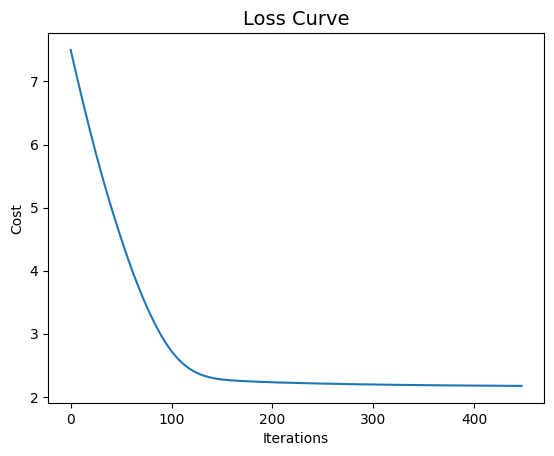

In [176]:
# see how well was the training of the model
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<Axes: >

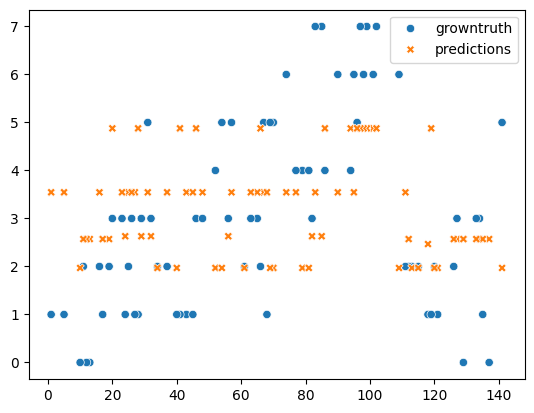

In [177]:
### see how well was the testing of the model

regression_res_df = pd.DataFrame({'growntruth': y_test,'predictions': y_pred})

sn.scatterplot(regression_res_df)

Valores mínimos del conjunto de datos:
Student Age                                                         1
Sex                                                                 1
Graduated high-school type                                          1
Scholarship type                                                    1
Additional work                                                     1
Regular artistic or sports activity                                 1
Do you have a partner                                               1
Total salary if available                                           1
Transportation to the university                                    1
Accommodation type in Cyprus                                        1
Mothers’ education                                                  1
Fathers’ education                                                  1
Number of sisters/brothers                                          1
Parental status                                    

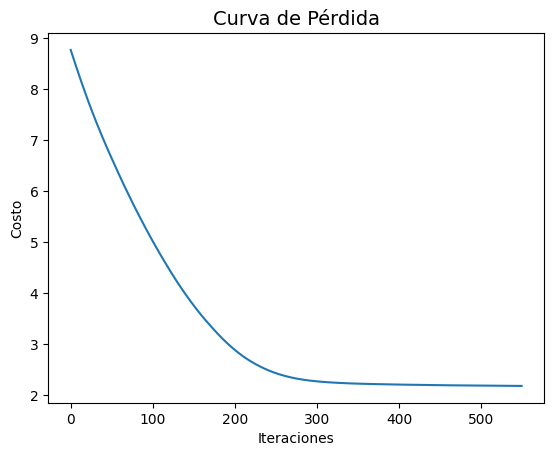

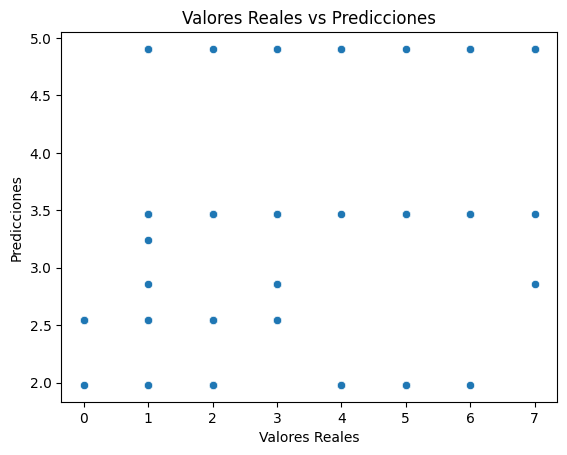

In [153]:

# Agrupando por la columna 'OGrade' para ver la distribución de los datos
dataset.groupby('OGrade').size()

# Eliminando la columna 'OGrade' que es nuestra variable objetivo
X = dataset.drop('OGrade', axis=1)

# Convirtiendo el DataFrame a un array de numpy y seleccionando solo dos columnas como características
X = X.to_numpy()[:, (0, 1)]

# La variable objetivo
y = dataset['OGrade']

# Dividiendo los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Imprimiendo los valores mínimos y máximos del conjunto de datos
print('Valores mínimos del conjunto de datos:\n{}'.format(dataset.min()))
print('Valores máximos del conjunto de datos:\n{}'.format(dataset.max()))

# Escalando los datos porque los modelos de ML son sensibles a variaciones en los rangos de valores
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Imprimiendo los valores mínimos y máximos del conjunto de datos escalado
print('Valores mínimos del conjunto de datos escalado:\n{}'.format(X_train_scaled.min()))
print('Valores máximos del conjunto de datos escalado:\n{}'.format(X_train_scaled.max()))

# Definiendo un regresor Perceptrón Multicapa (MLP)
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(40,),  # Definiendo las capas ocultas y los nodos
    max_iter=1500,             # Número máximo de iteraciones
    activation='relu',         # Función de activación
    solver='adam'              # Optimizador
)

# Entrenando el modelo
mlp_reg.fit(X_train_scaled, y_train)

# Prediciendo los valores para el conjunto de prueba
y_pred = mlp_reg.predict(X_test_scaled)

# Evaluando el modelo con diferentes métricas
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))
print('mse: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('varianza explicada: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

# Visualizando la curva de pérdida durante el entrenamiento del modelo
plt.plot(mlp_reg.loss_curve_)
plt.title("Curva de Pérdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

# Visualizando las predicciones del modelo vs los valores reales
regression_res_df = pd.DataFrame({'valor_real': y_test, 'predicciones': y_pred})
sn.scatterplot(x='valor_real', y='predicciones', data=regression_res_df)
plt.title("Valores Reales vs Predicciones")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

#otra cosa

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Cargar los datos
# generate a pandas dataframe with the file that contains the dataset
data = pd.read_csv(filepath_or_buffer = '/content/DATA.csv', names = [
    "Student ID",
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers’ education",
    "Fathers’ education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers’ occupation",
    "Fathers’ occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester",
    "Expected Cumulative grade point average in the graduation",
    "Course ID",
    "OGrade"])

# take a look of the data
data = data.iloc[1:]


# Separar características (X) y etiqueta (y)
X = data.drop(columns=['OGrade'])
y = data['OGrade']

# Codificación de características categóricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalización de características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la etiqueta
y_encoded = to_categorical(y)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir la arquitectura de la MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Asumiendo clasificación multiclase


In [127]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 2s 48ms/step - loss: 2.1473 - accuracy: 0.1739 - val_loss: 2.1394 - val_accuracy: 0.1250
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1.9664 - accuracy: 0.3043 - val_loss: 2.1206 - val_accuracy: 0.1250
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 1.8518 - accuracy: 0.3913 - val_loss: 2.1191 - val_accuracy: 0.1667
Epoch 4/50
10/10 [==============================] - 0s 12ms/step - loss: 1.7575 - accuracy: 0.4239 - val_loss: 2.1182 - val_accuracy: 0.2500
Epoch 5/50
10/10 [==============================] - 0s 12ms/step - loss: 1.6671 - accuracy: 0.5000 - val_loss: 2.1258 - val_accuracy: 0.2083
Epoch 6/50
10/10 [==============================] - 0s 13ms/step - loss: 1.5905 - accuracy: 0.5435 - val_loss: 2.1302 - val_accuracy: 0.2500
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 1.5181 - accuracy: 0.5978 - val_loss: 2.1345 - val_accuracy: 0.2500
Epoch 8/50
10

In [128]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 31ms/step - loss: 3.3683 - accuracy: 0.2414
Model Accuracy: 24.14%


In [129]:
import numpy as np

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)

# Convertir las predicciones y las etiquetas reales de vuelta a las etiquetas originales (no one-hot encoded)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)


1/1 [==============================] - 0s 71ms/step


Index(['Student ID', 'Student Age', 'Sex', 'Graduated high-school type',
       'Scholarship type', 'Additional work',
       'Regular artistic or sports activity', 'Do you have a partner',
       'Total salary if available', 'Transportation to the university',
       'Accommodation type in Cyprus', 'Mothers’ education',
       'Fathers’ education', 'Number of sisters/brothers', 'Parental status',
       'Mothers’ occupation', 'Fathers’ occupation', 'Weekly study hours',
       'Reading frequency (non-scientific books/journals)',
       'Reading frequency (scientific books/journals)',
       'Attendance to the seminars/conferences related to the department',
       'Impact of your projects/activities on your success',
       'Attendance to classes', 'Preparation to midterm exams 1',
       'Preparation to midterm exams 2', 'Taking notes in classes',
       'Listening in classes',
       'Discussion improves my interest and success in the course',
       'Flip-classroom', 'Cumulative gr

1/1 [==============================] - 0s 111ms/step


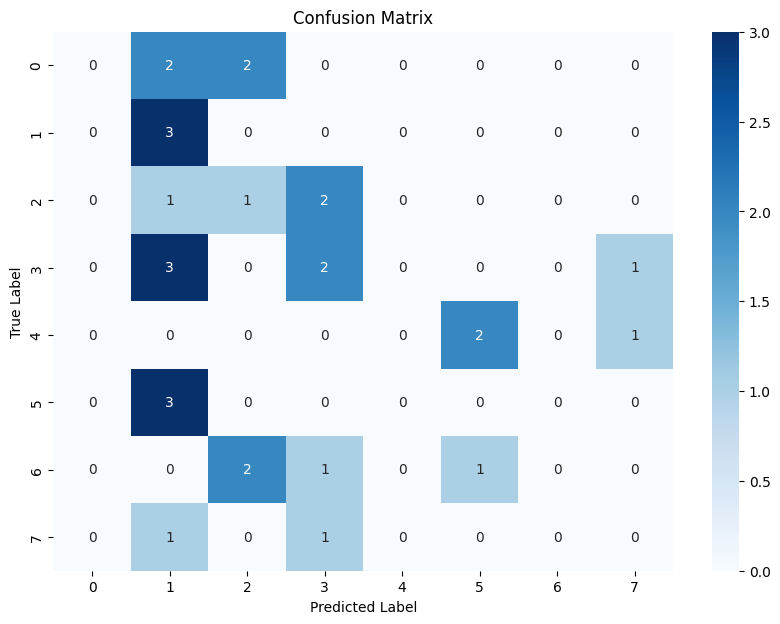

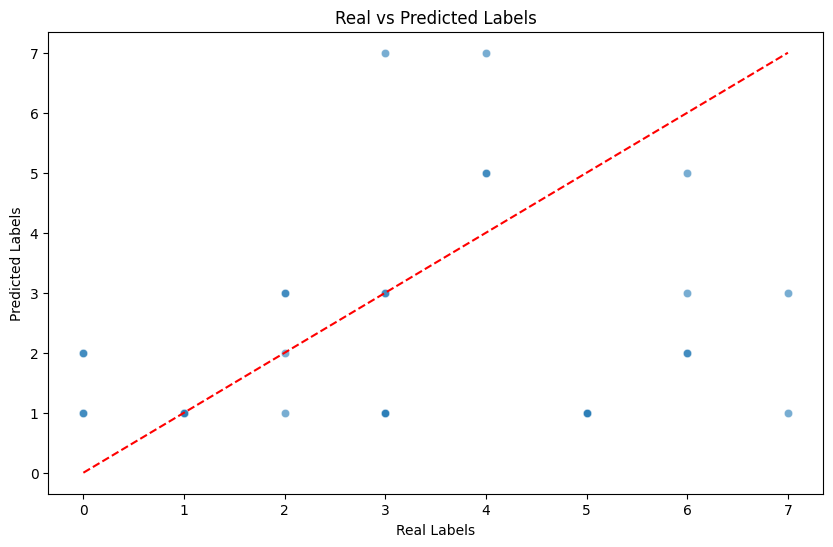

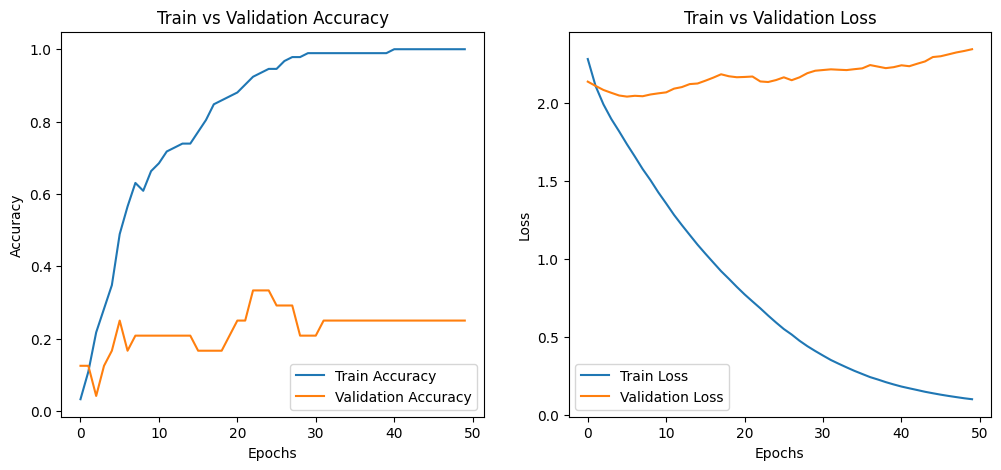

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Cargar los datos
data = pd.read_csv(filepath_or_buffer = '/content/DATA.csv', names = [
    "Student ID",
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers’ education",
    "Fathers’ education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers’ occupation",
    "Fathers’ occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester",
    "Expected Cumulative grade point average in the graduation",
    "Course ID",
    "OGrade"])

# take a look of the data
data = data.iloc[1:]

# Verificar los nombres de las columnas
print(data.columns)

# Si 'OGrade' tiene espacios, puedes renombrarla
data.rename(columns=lambda x: x.strip(), inplace=True)

# Separar características (X) y etiqueta (y)
X = data.drop(columns=['OGrade'], axis=1)
y = data['OGrade']

# Codificación de características categóricas
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Normalización de características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la etiqueta
y_encoded = to_categorical(y)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Definir la arquitectura de la MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Asumiendo clasificación multiclase

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)

# Convertir las predicciones y las etiquetas reales de vuelta a las etiquetas originales (no one-hot encoded)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 7))

# Graficar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))

# Configurar etiquetas y títulos
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Mostrar la gráfica
plt.show()

# Crear un DataFrame para facilitar la visualización
results = pd.DataFrame({'Real': y_test_labels, 'Predicted': y_pred_labels})

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=results, alpha=0.6)
plt.plot([min(y_test_labels), max(y_test_labels)], [min(y_test_labels), max(y_test_labels)], 'r--')  # Línea de referencia
plt.xlabel('Real Labels')
plt.ylabel('Predicted Labels')
plt.title('Real vs Predicted Labels')
plt.show()

# Graficar la precisión y la pérdida del entrenamiento y validación
# Graficar la precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

# Mostrar las gráficas
plt.show()
